In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import math
import re
import numpy as np
import json

In [2]:
dataset_column = ['en_curid', 'name', 'numlangs', 'birthcity', 'birthstate', 'countryName', 'countryCode',
             'countryCode3', 'LAT', 'LON', 'continentName', 'birthyear', 'gender', 'occupation',
             'industry', 'domain', 'TotalPageViews', 'L_star', 'StdDevPageViews', 'PageViewsEnglish',
             'PageViewsNonEnglish', 'AverageViews', 'HPI']

original_df = pd.read_csv("../data/pantheon.tsv",
                     header=0,
                     sep='\t',
                     names=dataset_column)

#df = df.sample(n=10000, random_state=1)

print("DATASET IMPORTED.")

DATASET IMPORTED.


In [3]:
initial_len = len(original_df)
print("Dataset is composed by {:d} rows before cleaning\n".format(initial_len))

Dataset is composed by 11341 rows before cleaning



In [4]:
print("People without birthyear")
index_to_delete = []
for index, row in original_df.iterrows():
    by = original_df.loc[index, 'birthyear']
    if by == 'Unknown':
        print(str(original_df.loc[index, 'en_curid']) + " -- " + str(original_df.loc[index, 'name']))
        index_to_delete.append(index)
        
        
for index in index_to_delete:
    original_df.drop(index, inplace=True)
        
print("\n\nPeople without continentName")
index_to_delete = []
for index, row in original_df.iterrows():
    if str(original_df.loc[index, 'continentName']) == str(np.nan):
        print(str(original_df.loc[index, 'en_curid']) + " -- " + str(original_df.loc[index, 'name']))
        index_to_delete.append(index)
    if original_df.loc[index, 'continentName'] == "Unknown":
        print(str(original_df.loc[index, 'en_curid']) + " -- " + str(original_df.loc[index, 'name']))
        index_to_delete.append(index)
        
for index in index_to_delete:
    original_df.drop(index, inplace=True)
    
original_df.reset_index(inplace=True)
df = original_df.copy()

People without birthyear
730866 -- Asa
23671899 -- Elisha


People without continentName
868 -- Alp Arslan
1436 -- Abraham
1617 -- Alexios V
1652 -- Alyattes II
1735 -- Ananda
2340 -- Antipope Felix II
2510 -- Arnulf of Carinthia, Holy Roman Emperor
8467 -- Draco
8799 -- D. B. Cooper
9331 -- Euclid
10442 -- Emperor Suizei
10443 -- Emperor Annei
13131 -- Géza, Grand Prince of the Hungarians
14408 -- Huneric
14981 -- Iktinos
16239 -- Jordanes
16479 -- Japheth
16821 -- Kallikrates
18507 -- Lucretia
20596 -- Mieszko II Lambert
20597 -- Mieszko I of Poland
23958 -- Pope Marcellus I
24008 -- Pope Benedict I
24053 -- Pope Boniface I
24272 -- Pope Siricius
24275 -- Pope Sixtus III
25789 -- Romulus Augustus
25877 -- Anastasios II
26560 -- Rurik
27786 -- Simon bar Kokhba
27951 -- Servius Tullius
28018 -- Simon Magus
28334 -- Sennacherib
28354 -- Samuel
29345 -- Shem
32168 -- Ulfilas
32569 -- Vitellius
32794 -- Marcus Vitruvius Pollio
32802 -- Vercingetorix
34454 -- Zosimus
36674 -- Glycerius
371

875991 -- Sobekneferu
910996 -- Pepi I Meryre
920575 -- Hippasus
922446 -- Reuben
948439 -- Mazdak
965602 -- Antigonus III Doson
1010902 -- Kamose
1057410 -- Parmenion
1061030 -- Eumenes II
1070870 -- Hattusili III
1098645 -- Djedefra
1105079 -- Ptolemy X Alexander I
1127415 -- Tancred, Prince of Galilee
1154494 -- Naram-Sin
1168295 -- Merneptah
1185646 -- Mentuhotep II
1198073 -- Harsha
1241274 -- Ramesses VI
1249652 -- Djer
1249802 -- Hor-Aha
1260928 -- Tupac Inca Yupanqui
1351167 -- Antipope Laurentius
1401089 -- Eutropius
1439564 -- Theudebert II
1439623 -- Theuderic II
1439773 -- Dagobert III
1467835 -- Berengar I of Italy, Holy Roman Emperor
1581865 -- Nynetjer
1586608 -- Djet
1586661 -- Den
1586730 -- Sekhemkhet
1586815 -- Huni
1586952 -- Shepseskaf
1587039 -- Userkaf
1587162 -- Neferirkare Kakai
1590411 -- Intef I
1660132 -- Amenemhat IV
1688540 -- Childebert III
1840217 -- Amenemhat I
1881169 -- Herod Archelaus
1925495 -- Theuderic IV
1927612 -- Amenemhat II
1927695 -- Senusre

In [5]:
print("Dataset is composed by {:d} rows after cleaning\n".format(len(original_df)))
print("Removed {:.2f} % of data\n".format((1-(len(df)/initial_len))*100))

Dataset is composed by 10903 rows after cleaning

Removed 3.86 % of data



In [6]:
# To apply PCA, we transform string values into numerical values

string_fields = {
    'birthcity': {},
    'birthstate': {},
    'countryName': {},
    'countryCode': {},
    'countryCode3': {},
    'continentName': {},
    'domain': {},
    'gender': {},
    'occupation': {}
}

for field_name, field_dict in string_fields.items():
    i = 0
    for elem in df[field_name]:
        if elem not in field_dict:
            field_dict[elem] = i
            i+=1
    
for field_name, field_dict in string_fields.items():
    for elem, i in field_dict.items():
        if len(field_dict) < 10:
            field_dict[elem] = i
        elif len(field_dict) > 10 and len(field_dict) < 100:
            if i < 10:
                field_dict[elem] = "0" + str(i)
            else:
                field_dict[elem] = i
        elif len(field_dict) > 100 and len(field_dict) < 1000:
            if i < 10:
                field_dict[elem] = "00" + str(i)
            elif i < 100:
                field_dict[elem] = "0" + str(i)
            else:
                field_dict[elem] = i
        else:
            if i < 10:
                field_dict[elem] = "000" + str(i)
            elif i < 100:
                field_dict[elem] = "00" + str(i)
            elif i < 1000:
                field_dict[elem] = "0" + str(i)
            else:
                field_dict[elem] = i
            
    df[field_name].replace(field_dict, inplace=True)
    
for index, row in df.iterrows():
    df.loc[index, "Numeric_countryCode3"] = str(df.loc[index, "continentName"]) + str(df.loc[index, "countryCode3"])
    df.loc[index, 'Numeric_birthcity'] = str(df.loc[index, "continentName"]) + str(df.loc[index, "countryCode3"]) + str(df.loc[index, 'birthcity'])
    

In [7]:
string_fields

{'birthcity': {'Hodgenville': '0000',
  'Stageira': '0001',
  'Saint Petersburg': '0002',
  'Las Vegas': '0003',
  'Godalming': '0004',
  'Zavrazhye': '0005',
  'Gdańsk': '0006',
  'Ulm': '0007',
  'Pella': '0008',
  'Leytonstone': '0009',
  'Hajdúböszörmény': '0010',
  'Stockholm': '0011',
  'Edinburgh': '0012',
  'Pittsburgh': '0013',
  'Tokyo': '0014',
  'Moscow': '0015',
  'Ryazan': '0016',
  'Hampstead': '0017',
  'Adams Center': '0018',
  'Mannheim': '0019',
  'London': '0020',
  'Dréan': '0021',
  'Torquay': '0022',
  'Other': '0023',
  'Newark': '0024',
  'Zlatoust': '0025',
  'Athens': '0026',
  'Kaysersberg': '0027',
  'Sainte-Foy-lès-Lyon': '0028',
  'Paris': '0029',
  'Bukhara': '0030',
  'Broglie': '0031',
  'Miletus': '0032',
  'Royal Leamington Spa': '0033',
  'Maida Vale': '0034',
  'Logierait': '0035',
  'Patna': '0036',
  'Mexico City': '0037',
  'Lanuvium': '0038',
  'Rome': '0039',
  'Lyon': '0040',
  'Trier': '0041',
  'Samaria': '0042',
  'York': '0043',
  'Venice

In [7]:
print("Dataset Analysis")
print("There are {:d} different birthcities".format(len(string_fields['birthcity'])))
print("There are {:d} different birthstates".format(len(string_fields['birthstate'])))
print("There are {:d} different countries".format(len(string_fields['countryCode3'])))
print("There are {:d} different continents".format(len(string_fields['continentName'])))
print("There are {:d} different domains".format(len(string_fields['domain'])))
print("There are {:d} different gender".format(len(string_fields['gender'])))
print("There are {:d} different occupations".format(len(string_fields['occupation'])))

Dataset Analysis
There are 5094 different birthcities
There are 80 different birthstates
There are 195 different countries
There are 6 different continents
There are 8 different domains
There are 2 different gender
There are 88 different occupations


In [8]:
#replace lat and lon with numerical values or 0 if are Nan
def coo_replacement(val):
    if not math.isnan(val):
        return float(val)
    else:
        return 0
    
#replace birthyear with numerical values
def birthyear_replacement(val):
    if "s" in str(val):
        return int(val.replace("s", ""))
    elif "?" in str(val):
        return int(val.replace("?", ""))
    else:
        return int(val)
        
df.LAT = df.LAT.apply(coo_replacement)
df.LON = df.LON.apply(coo_replacement)
df.birthyear = df.birthyear.apply(birthyear_replacement)

In [9]:
#PCA

geo_features = ['continentName', 'Numeric_countryCode3', 'Numeric_birthcity', 'LAT', 'LON']
# Separating out the features
x = df.loc[:, geo_features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)
geo_components = pca.fit_transform(x)
geo_df = pd.DataFrame(data=geo_components, 
                           columns=['PCA_geo'])
print(geo_df)

        PCA_geo
0     -2.186618
1     -0.064643
2     -0.359972
3     -2.327654
4     -0.383487
...         ...
10898  2.208973
10899 -0.069611
10900 -0.266582
10901  3.242342
10902 -0.127720

[10903 rows x 1 columns]


PCA applied to geographic fields

{'North America': 0, 'Europe': 1, 'Asia': 2, 'Africa': 3, 'South America': 4, 'Oceania': 5}
0        0
1        1
2        1
3        0
4        1
        ..
10898    2
10899    1
10900    1
10901    3
10902    1
Name: continentName, Length: 10903, dtype: int64


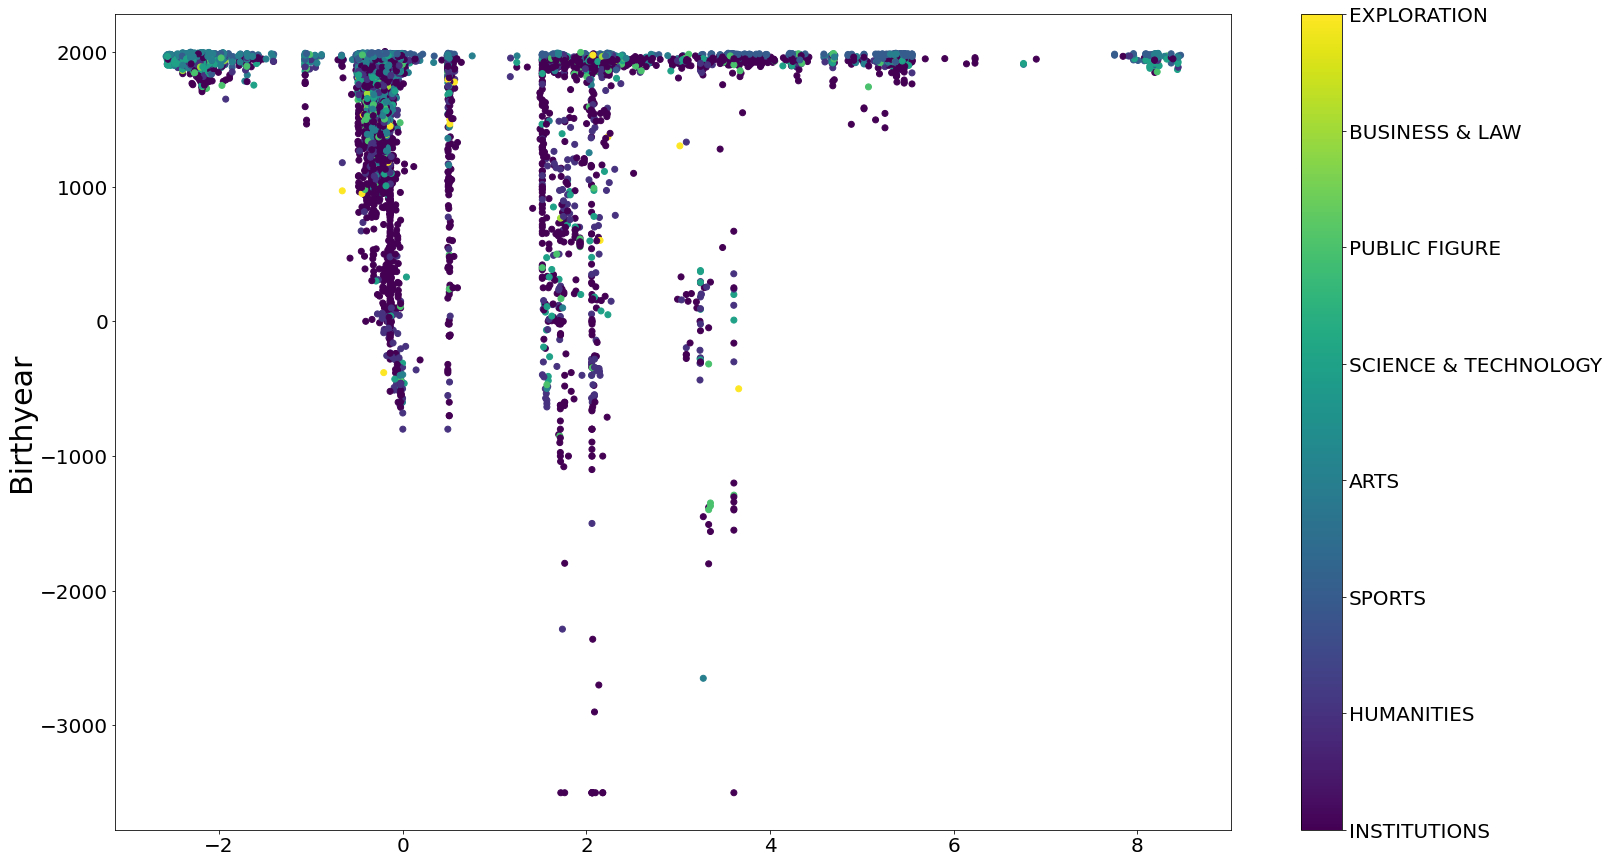

In [10]:
print("PCA applied to geographic fields\n")

print(string_fields['continentName'])

print(df.continentName)

def fmt_co(x, pos):
    return [key  for (key, value) in string_fields['continentName'].items() if value == x][0]

def fmt_do(x, pos):
    return [key  for (key, value) in string_fields['domain'].items() if value == x][0]

fig, ax = plt.subplots(figsize=(25,15))
sc = ax.scatter(geo_df.PCA_geo, df.birthyear, c=df.domain, cmap='viridis')
cbar = fig.colorbar(sc, format=ticker.FuncFormatter(fmt_do));
cbar.ax.tick_params(labelsize=20)
plt.ylabel("Birthyear", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
geo_features2 = ['continentName', 'countryCode3', 'birthcity', 'LAT', 'LON']
# Separating out the features
x2 = df.loc[:, geo_features2].values
# Standardizing the features
x2 = StandardScaler().fit_transform(x2)

tsne = TSNE(n_components=1)
geo_components2 = tsne.fit_transform(x2)

geo2_df = pd.DataFrame(data=geo_components2, 
                           columns=['TSNE_geo'])

In [ ]:
print("TSNE applied to geographic fields\n")


def fmt_con(x, pos):
    return [key  for (key, value) in string_fields['continentName'].items() if value == pos][0]

def fmt_inst(x, pos):
    foo = [key  for (key, value) in string_fields['domain'].items() if value == x]
    if len(foo) > 0:
        return [key  for (key, value) in string_fields['domain'].items() if value == x][0]
    else:
        return None
    
fig, ax = plt.subplots(figsize=(30,15))
sc = ax.scatter(geo2_df.TSNE_geo, df.birthyear, c=df.continentName, cmap='inferno')
cbar = fig.colorbar(sc, format=ticker.FuncFormatter(fmt_con));
#cbar = fig.colorbar(sc);
cbar.ax.tick_params(labelsize=20) 
plt.ylabel("Birthyear", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("Geographic Position")

In [ ]:
final_df = original_df[['en_curid', 'name', 'numlangs', 'birthcity', 'birthstate', 'countryName', 'countryCode',
             'countryCode3', 'LAT', 'LON', 'continentName', 'birthyear', 'gender', 'occupation',
             'industry', 'domain', 'TotalPageViews', 'L_star', 'StdDevPageViews', 'PageViewsEnglish',
             'PageViewsNonEnglish', 'AverageViews', 'HPI']]

df.rename(columns={'continentName': 'Numeric_continentName'}, inplace=True)
final_df = pd.concat([final_df, df[['Numeric_continentName','Numeric_countryCode3', 'Numeric_birthcity']]], axis=1)
final_df = pd.concat([final_df, geo_df["PCA_geo"]], axis=1)
final_df = pd.concat([final_df, geo2_df["TSNE_geo"]], axis=1)